## Image Processing Challenge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import math

In [2]:
### methos to convert RGB image to GRAY Image
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

### Read Image into numpy array

In [3]:
def get_image(path):
    return mpimg.imread(path)

### Write numpy array to Image

In [4]:
def save_image(path,arr):
    try:
        mpimg.imsave(path,arr)
    except:
        os.mkdir(path.split('/')[0])
        mpimg.imsave(path,arr)

### Create html file 

In [5]:
index_path = os.path.join("my_output.html")
if os.path.exists(index_path):
    file = open(index_path, "a")
else:
    file = open(index_path, "w")
    file.write("<html>\n")
    file.write("<head>\n")
    file.write("<title>\n")
    file.write("Image Processing Challenge\n")
    file.write(" </title>\n")
    file.write("<body bgcolor='#ffffff'>\n")
    file.write("<br><hr>\n")
    file.write("<center><h2>Image Processing Challenge<br> Submitted by : Omkar Thawakar</h2></center>\n")
    file.write("<br><hr>\n")
    file.write("<H2>List of Implemented Features</H2>\n")
    file.write("I have implemented the following features:\n")
    file.write("<ul>\n")
    for type_ in ['Brightness','Contrast','Blur','Sharpen','EdgeDetect','Scale','Composite']:
        file.write("<li><a href='#{}'>{}</a></li>\n".format(type_,type_))
    file.write("</ul>\n")
    file.write("<br><hr>\n")
    file.write("<h2>Demonstration of Implemented Features</h2>\n") 


### 1 . Brightness

In [6]:
file.write("<h3><A name='Brightness'>Brightness</h3>\n")
file.write("<table>\n")
file.write("<tr>\n")

im = get_image("input/princeton_small.jpg")

### write to html file
file.write("<td><a href='input/princeton_small.jpg'><img width=200 src='input/princeton_small.jpg'></a></td>\n")

output_paths = ['output/princeton_small_brightness_0.0.jpg',
                'output/princeton_small_brightness_0.5.jpg',
                'output/princeton_small_brightness_2.0.jpg',
                ]
factors = [0.0,0.5,2.0]
for factor,path in zip(factors,output_paths) :
    if factor > 1.0 :
        output = np.array(np.where((255-im)<im,255,im*2.0),dtype='uint8')
    else:
        output = np.array(im*factor,dtype='uint8')
    
    save_image(path,output)
    file.write("<td><a href={}'><img width=200 src='{}'></a></td>\n".format(path,path))
    
file.write("</tr>\n")
file.write("<tr><td align='center'> Input </td>\
            <td align='center'> Brightness 0.0 </td>\
            <td align='center'> Brightness 0.5 </td>\
            <td align='center'> Brightness 2.0 </td>\
            </tr>\n")
file.write("<tr>\
            <td vAlign=top align=middle colspan='5'>\
              output/princeton_small_brightness_0.0.jpg: input/princeton_small.jpg <br>\
                $(EXE) $^ $@ -brightness 0.0 <br>\
              output/princeton_small_brightness_0.5.jpg: input/princeton_small.jpg <br>\
                $(EXE) $^ $@ -brightness 0.5 <br>\
              output/princeton_small_brightness_2.0.jpg: input/princeton_small.jpg <br>\
                $(EXE) $^ $@ -brightness 2.0 <br>\
            </td>\n")
file.write("<tr></table><br><hr>\n")


21

### 2. Constrast 

In [7]:
file.write("<h3><A name='Contrast'>Contrast</h3>\n<table>\n<tr>\n")

image = get_image("input/c.jpg")

file.write("<td><a href='input/c.jpg'><img width=200 src='input/c.jpg'></a></td>\n")

69

In [8]:
def adjust_contrast(image,contrast):
    factor = (259 * (contrast*100 + 255)) / (255 * (259 - contrast*100))
    output = np.copy(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r,g,b = image[i,j,:]
            newRed   = factor * (r   - 128) + 128
            newGreen = factor * (g - 128) + 128
            newBlue  = factor * (b  - 128) + 128
            output[i,j,:] = np.array([max(0, min(255, newRed)), max(0, min(255, newGreen)), max(0, min(255, newBlue))], dtype='uint8')
    return output

In [9]:
output_paths = ['output/c_contrast_-0.5.jpg',
                'output/c_contrast_0.0.jpg',
                'output/c_contrast_0.5.jpg',
                'output/c_contrast_2.0.jpg'
                ]
factors = [-0.5,0.0,0.5,2.0]
for factor,path in zip(factors,output_paths) :
    output = adjust_contrast(image, factor)
    save_image(path,output)
    file.write("<td><a href={}'><img width=200 src='{}'></a></td>\n".format(path,path))
    
file.write("</tr>\n")
file.write("<tr><td align='center'> Input </td>\
            <td align='center'> Contrast -0.5  </td>\
            <td align='center'> Contrast 0.0 </td>\
            <td align='center'> Contrast 0.5 </td>\
            <td align='center'> Contrast 2.0 </td>\
            </tr>\n")
file.write("<tr>\
            <td vAlign=top align=middle colspan='5'>\
              output/c_contrast_-0.5.jpg: input/c.jpg<br>\
            $(EXE) $^ $@ -contrast -0.5 <br>\
          output/c_contrast_0.0.jpg: input/c.jpg <br>\
            $(EXE) $^ $@ -contrast 0.0 <br>\
          output/c_contrast_0.5.jpg: input/c.jpg <br>\
            $(EXE) $^ $@ -contrast 0.5 <br>\
          output/c_contrast_2.0.jpg: input/c.jpg <br>\
            $(EXE) $^ $@ -contrast 2.0 <br>\
            </td>\n")
file.write("<tr></table><br><hr>\n")

21

### 3. Blur ( Convolution with Gaussion Low Pass filter)

In [10]:
def conv_2d(image, kernel, average=False):
    ###### create output image with zeros
    output = np.zeros(image.shape)
 
    pad_height = int((kernel.shape[0] - 1) / 2)
    pad_width = int((kernel.shape[1] - 1) / 2)
 
    ###### Create Padded images with zeros
    padded_image = np.zeros((image.shape[0] + (2 * pad_height), image.shape[1] + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    ###### Convolution Operation
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel.shape[0], col:col + kernel.shape[1]])
            if average:
                output[row, col] /= kernel.shape[0]*kernel.shape[1]
 
    return output

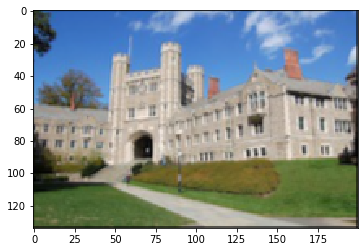

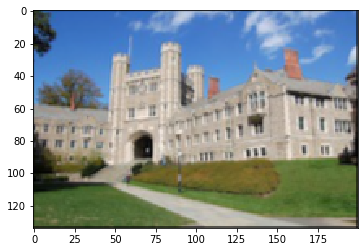

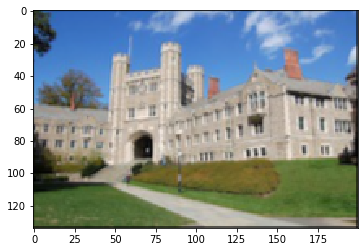

21

In [11]:
def gaussian_kernel(size, sigma=8):
    def gaussian_mask(x, mu, sd):
        return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
    linear_filter = np.linspace(-(size // 2), size // 2, size)
    #### create gaussian mask
    #### exp(-(X.^2 + Y.^2) / (2*sigma*sigma));
    for i in range(len(linear_filter)):
        linear_filter[i] = gaussian_mask(linear_filter[i], 0, sigma) 
    #### create 2D filter (3x3) by outer product of linear filter (3x1)
    filter_ = np.outer(linear_filter.T, linear_filter.T)    
    return filter_
 
def gaussian_blur(image, kernel_size,sigma):
    #kernel = gaussian_kernel(kernel_size, sigma=sigma)
    kernel = np.array( [[1,   4,  7],
                        [4,   16,  26],
                        [7, 26, 41]])/27*2
    return conv_2d(image, kernel, average=True)

file.write("<h3><A name='Blur'>Blur</h3>\n<table>\n<tr>\n")

image = get_image('input/princeton_small.jpg')

file.write("<td><a href='input/princeton_small.jpg'><img width=200 src='input/princeton_small.jpg'></a></td>\n")

output_paths = ['output/blur_0.125.jpg',
                'output/blur_2.jpg',
                'output/blur_8.jpg',
                ]
sigma = [0.125,2,8]

for path,s in zip(output_paths,sigma):
    output = []
    for i in range(image.shape[2]):
        output.append(gaussian_blur(image[:,:,i], 7,s))
    output = np.concatenate([np.expand_dims(out,axis=2) for out in output],axis=2)
    #output = np.array(np.where((255-out)<out,255,out*2),dtype='uint8')
    save_image(path,np.array(output,dtype='uint8'))
    file.write("<td><a href={}'><img width=200 src='{}'></a></td>\n".format(path,path))

    plt.imshow(np.array(output,dtype='uint8'))
    plt.show()
    
file.write("</tr>\n")
file.write("<tr><td align='center'> Input </td>\
            <td align='center'> Blur 0.125  </td>\
            <td align='center'> Blur 2 </td>\
            <td align='center'> Blur 8 </td>\
            </tr>\n")
file.write("<tr>\
            <td vAlign=top align=middle colspan='5'>\
              output/blur_0.125.jpg: input/princeton_small.jpg <br>\
            $(EXE) $^ $@ -blur 0.125 <br>\
          output/blur_2.jpg: input/princeton_small.jpg <br>\
            $(EXE) $^ $@ -blur 2 <br>\
          output/blur_8.jpg: input/princeton_small.jpg <br>\
            $(EXE) $^ $@ -blur 8 <br>\
            </td>\n")
file.write("<tr></table><br><hr>\n")


### 4. Sharpening

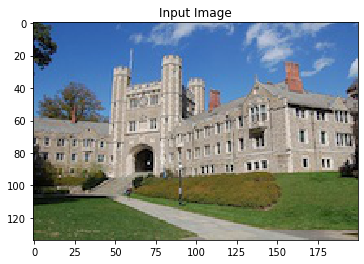

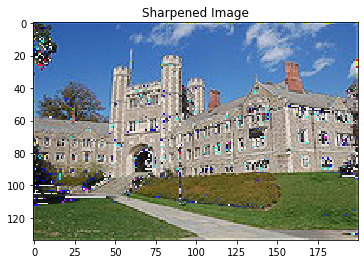

21

In [12]:
def sharp(image):
    #### High Pass filter is used for sharpening
    kernel = np.array( [[0,   -0.25,  0],
                        [-0.25,   2,  -0.25],
                        [0,   -0.25,  0]])
    return conv_2d(image, kernel, average=False)

file.write("<h3><A name='Sharpen'>Sharpen</h3>\n<table>\n<tr>\n")
image = get_image('input/princeton_small.jpg')
file.write("<td><a href='input/princeton_small.jpg'><img width=200 src='input/princeton_small.jpg'></a></td>\n")

plt.imshow(image)
plt.title('Input Image')
plt.show()
output = []
for i in range(image.shape[2]):
    output.append(sharp(image[:,:,i]))
output = np.concatenate([np.expand_dims(out,axis=2) for out in output],axis=2)
save_image('output/sharpen.jpg',np.array(output,dtype='uint8'))

plt.imshow(np.array(output,dtype='uint8'))
plt.title('Sharpened Image')
plt.show()

file.write("<td><a href={}'><img width=200 src='{}'></a></td>\n".format('output/sharpen.jpg','output/sharpen.jpg'))
    
file.write("</tr>\n")
file.write("<tr><td align='center'> Input </td>\
            <td align='center'> Sharpen  </td>\
            </tr>\n")
file.write("<tr>\
            <td vAlign=top align=middle colspan='5'>\
              output/sharpen.jpg: input/princeton_small.jpg <br>\
               $(EXE) $^ $@ -sharpen <br>\
            </td>\n")
file.write("<tr></table><br><hr>\n")

### 5. Edges Horizontal, Verticle and Combined

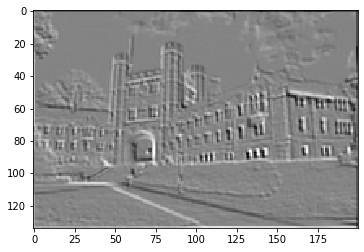

21

In [13]:
file.write("<h3><A name='EdgeDetect'>EdgeDetect</h3>\n<table>\n<tr>\n")
image = get_image('input/princeton_small.jpg')
file.write("<td><a href='input/princeton_small.jpg'><img width=200 src='input/princeton_small.jpg'></a></td>\n")
image = rgb2gray(image)  
kernel = np.array( [[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])
edge_verticle =  conv_2d(image, kernel, average=False)

kernel = np.array( [[1,   1,  1],
                    [0,   0,  0],
                    [-1, -1, -1]])
edge_horizontal =  conv_2d(image, kernel, average=False)
save_image('output/edgedetect.jpg',(edge_verticle+edge_horizontal)/2)
plt.imshow((edge_verticle+edge_horizontal)/2, cmap='gray')
plt.show()

file.write("<td><a href={}'><img width=200 src='{}'></a></td>\n".format('output/edgedetect.jpg','output/edgedetect.jpg'))
    
file.write("</tr>\n")
file.write("<tr><td align='center'> Input </td>\
            <td align='center'> Edge Detect  </td>\
            </tr>\n")
file.write("<tr>\
            <td vAlign=top align=middle colspan='5'>\
              output/edgedetect.jpg: input/princeton_small.jpg <br>\
            $(EXE) $^ $@ -edge <br>\
            </td>\n")
file.write("<tr></table><br><hr>\n")

### 6. Image Resampling

### a. Point Sampling of Image

In [14]:
file.write("<h3><A name='Scale'>Scale</h3>\n<table>\n<tr>\n")
image = get_image('input/scaleinput.jpg')
file.write("<td><a href='input/scaleinput.jpg'><img src='input/scaleinput.jpg'></a></td>\n")

77

In [15]:
image = get_image("input/scaleinput.jpg")
factor = 0.3
new_shape = [int(image.shape[0]*factor), int(image.shape[1]*factor), image.shape[2]]

### Create output size image
new_image = np.zeros(new_shape, dtype=np.uint8)

row_stride,col_stride = image.shape[0] // new_image.shape[0], image.shape[1] // new_image.shape[1]

######### create 1x1 filter to compute average of nearest pixels
kernel = np.ones((row_stride,row_stride),dtype='float32')

def get_average(patch,kernel):
    out = []
    for channel in range(patch.shape[2]):
        out.append(np.sum(np.multiply(patch[:,:,channel],kernel))/9)
    return np.array(out,dtype='uint8')
    
for r in range(new_image.shape[0]):
    for c in range(new_image.shape[1]):
        row = int(r * row_stride) 
        col = int(c * col_stride)
        new_image[r, c] = get_average(image[row:row+row_stride,col:col+col_stride,:],kernel)

save_image('output/scale_point.jpg',new_image)
file.write("<td><a href={}'><img src='{}'></a></td>\n".format('output/scale_point.jpg','output/scale_point.jpg'))

80

### b. Downsample with BiLinear Interpolation

In [16]:
def get_pixel_value(image, x, y):
    x_i,y_i = int(x),int(y)
    x_f, y_f = x - x_i, y - y_i
    x_lim = min(x_i+1,image.shape[1]-1)
    y_lim = min(y_i+1,image.shape[0]-1)

    #Get pixels in original image from corners
    bl = image[y_i, x_i, :]
    br = image[y_i, x_lim, :]
    tl = image[y_lim, x_i, :]
    tr = image[y_lim, x_lim, :]

    #Calculate interpolation
    b = x_f * br + (1. - x_f) * bl
    t = x_f * tr + (1. - x_f) * tl
    pxf = y_f * t + (1. - y_f) * b

    return np.array(pxf+0.5, dtype='uint8')
 
image = get_image("input/scaleinput.jpg")
factor = 0.3
new_shape = [int(image.shape[0]*factor), int(image.shape[1]*factor), image.shape[2]]

### Create output size image
new_image = np.zeros(new_shape, dtype=np.uint8)

row_stride,col_stride = image.shape[0] / new_image.shape[0], image.shape[1] / new_image.shape[1]

for r in range(new_image.shape[0]):
    for c in range(new_image.shape[1]):
        orir = r * row_stride 
        oric = c * col_stride
        new_image[r, c] = get_pixel_value(image, oric, orir)

save_image('output/scale_bilinear.jpg',new_image)
file.write("<td><a href={}'><img src='{}'></a></td>\n".format('output/scale_bilinear.jpg','output/scale_bilinear.jpg'))

86

### c. Image Scaling with gaussian filter

In [17]:
image = get_image("input/scaleinput.jpg")
factor = 0.3
new_shape = [int(image.shape[0]*factor), int(image.shape[1]*factor), image.shape[2]]

### Create output size image
new_image = np.zeros(new_shape, dtype=np.uint8)

row_stride,col_stride = image.shape[0] // new_image.shape[0], image.shape[1] // new_image.shape[1]

kernel = gaussian_kernel(row_stride, sigma=0.15)

def gaussian_scale(patch,kernel):
    out = []
    for channel in range(patch.shape[2]):
        out.append(np.sum(np.multiply(patch[:,:,channel],kernel))/9)
    return np.array(out,dtype='uint8')
    
for r in range(new_image.shape[0]):
    for c in range(new_image.shape[1]):
        row = int(r * row_stride) 
        col = int(c * col_stride)
        new_image[r, c] = gaussian_scale(image[row:row+row_stride,col:col+col_stride,:],kernel)

save_image('output/scale_gaussian.jpg',new_image)
file.write("<td><a href={}'><img src='{}'></a></td>\n".format('output/scale_gaussian.jpg','output/scale_gaussian.jpg'))

86

In [18]:
file.write("</tr>\n")
file.write("<tr><td align='center'> Input </td>\
            <td align='center'> Point 0.3 0.3  </td>\
            <td align='center'> Bilinear 0.3 0.3 </td>\
            <td align='center'> Gaussian 0.3 0.3 </td>\
            </tr>\n")
file.write("<tr>\
            <td vAlign=top align=middle colspan='5'>\
              output/scale_gaussian.jpg: input/scaleinput.jpg <br>\
              $(EXE) $^ $@ -gaussian_sampling -scale 0.3 0.3 <br>\
            output/scale_point.jpg: input/scaleinput.jpg <br>\
              $(EXE) $^ $@ -point_sampling -scale 0.3 0.3 <br>\
            output/scale_bilinear.jpg: input/scaleinput.jpg <br>\
              $(EXE) $^ $@ -bilinear_sampling -scale 0.3 0.3 <br>\
            </td>\n")
file.write("<tr></table><br><hr>\n")

21

### 7. Composite Operations

In [19]:
file.write("<h3><A name='Composite'>Composite</h3>\n<table>\n<tr>\n")
file.write("<td><a href='input/comp_background.jpg'><img width=200 src='input/comp_background.jpg'></a></td>\n")
file.write("<td><a href='input/comp_foreground.jpg'><img width=200 src='input/comp_foreground.jpg'></a></td>\n")
file.write("<td><a href='input/comp_mask.jpg'><img width=200 src='input/comp_mask.jpg'></a></td>\n")

85

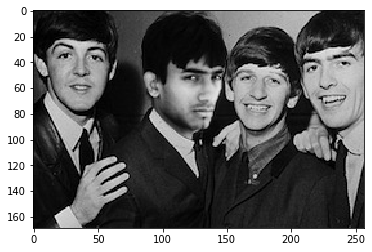

In [20]:
foreground = get_image("input/comp_foreground.jpg")
background = get_image("input/comp_background.jpg")
alpha = get_image("input/comp_mask.jpg")

alpha = np.array(alpha/255, dtype='float32')

foreground = np.multiply(alpha, foreground)

background = np.multiply(1.0 - alpha, background)

output = np.add(foreground, background)

save_image('output/composite.jpg',np.array(output, dtype='uint8'))

file.write("<td><a href='output/composite.jpg'><img width=200 src='output/composite.jpg'></a></td>\n")

plt.imshow(np.array(output, dtype='uint8'))
plt.show()


In [21]:
file.write("</tr>\n")
file.write("<tr><td align='center'> Base </td>\
            <td align='center'> Top  </td>\
            <td align='center'> Alpha Channel of Top </td>\
            <td align='center'> Result </td>\
            </tr>\n")
file.write("<tr>\
            <td vAlign=top align=middle colspan='5'>\
              output/composite.jpg: input/comp_background.jpg <br>\
      $(EXE) $^ $@ -composite input/comp_background.jpg input/comp_foreground.jpg input/comp_mask.jpg 0 <br>\
            </td>\n")
file.write("<tr></table><br><hr>\n")

file.write("</body></html>")

file.close()